# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3)

%matplotlib inline

# Load data
## Content

* brand 
* model 
* year - registration year
* price - price in £
* transmission - type of gearbox
* mileage - distance used
* fuelType - engine fuel
* tax - road tax
* mpg - miles per gallon
* engineSize - size in litres


In [2]:
car_df = pd.read_csv("./uk_used_car.csv")
car_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi
...,...,...,...,...,...,...,...,...,...,...
99181,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0,Volkswagen
99182,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2,Volkswagen
99183,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4,Volkswagen
99184,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2,Volkswagen


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99186 entries, 0 to 99185
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99186 non-null  object 
 1   year          99186 non-null  int64  
 2   price         99186 non-null  int64  
 3   transmission  99186 non-null  object 
 4   mileage       99186 non-null  int64  
 5   fuelType      99186 non-null  object 
 6   tax           99186 non-null  int64  
 7   mpg           99186 non-null  float64
 8   engineSize    99186 non-null  float64
 9   brand         99186 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


# EDA

In [4]:
cat_cols = [col for col in car_df.columns if car_df[col].dtype=="object"]
num_cols = car_df.columns.drop(cat_cols)

print("cat_cols", cat_cols)
print("num_cols", num_cols)

cat_cols ['model', 'transmission', 'fuelType', 'brand']
num_cols Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


<Axes: xlabel='price'>

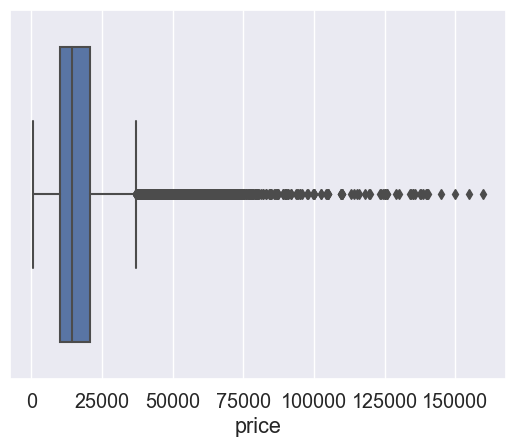

In [5]:
sns.boxplot(data=car_df, x="price")

In [6]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,99186.0,2017.087291,2.119570,1970.0,2016.0,2017.0,2019.00,2020.0
price,99186.0,16805.451606,9866.768844,450.0,9999.0,14495.0,20870.00,159999.0
mileage,99186.0,23058.594126,21148.390071,1.0,7424.5,17460.0,32337.75,323000.0
tax,99186.0,120.298984,63.150672,0.0,125.0,145.0,145.00,580.0
mpg,99186.0,55.166950,16.138556,0.3,47.1,54.3,62.80,470.8
engineSize,99186.0,1.663283,0.557649,0.0,1.2,1.6,2.00,6.6


In [ ]:
car_df.hist(bins=50, figsize=(14, 9))

In [ ]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(['transmission', 'fuelType', 'brand']):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=car_df, x=col)

In [ ]:
plt.figure(figsize=(18, 8))
for i, col in enumerate(['transmission', 'fuelType', 'brand']):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=car_df, x=col, y="price")

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_df.corr(), annot=True)

In [ ]:
car_df.groupby(["brand"]).mean()

In [ ]:
car_df.pivot_table(values="price", index=["brand"], columns="transmission", margins=True)

In [ ]:
pd.crosstab(index=car_df.transmission, columns=car_df.fuelType, normalize="index", margins=True)

# Feature engineering

In [ ]:
# drop outliers
car_df = car_df[car_df["price"] < 60000]

In [ ]:
sns.boxplot(data=car_df ,x="price")

In [ ]:
# drop year less than 2005
car_df = car_df[2001<=car_df["year"]]

In [ ]:
# age of car
car_df["age"] = 2021 - car_df["year"]

In [ ]:
sns.barplot(data=car_df, x="age", y="price")

In [ ]:
# normalize mileage 
car_df["mileage"] = np.log10(car_df["mileage"])

In [ ]:
sns.histplot(data=car_df ,x="mileage")

In [ ]:
# brands sorted by mean prices
brand_dict = {'Mercedes': 0, 'Audi': 1, 'BMW': 2, 'Volkswagen': 3, 'Skoda': 4,
                'Hyundi': 5, 'Toyota': 6, 'Ford': 7, 'Vauxhall': 8}
                
car_df["brand_rank"] = car_df["brand"].map(brand_dict)

In [ ]:
sns.barplot(data=car_df, x="brand_rank", y="price") 

In [ ]:
# transmission type is 'Manual'
car_df["transmission_Manual"] = [1 if x=="Manual" else 0 for x in car_df["transmission"]]

In [ ]:
sns.barplot(data=car_df, x="transmission_Manual", y="price") 

In [ ]:
# save final data
car_df.to_csv("eda_data.csv", index=False)